# SF Crime Data Project - Group 6
This file contains code for the final project for MSDS-596 that expleares San Francisco crime data that was obtained from https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry. Exploration and analysis of data was done using Python and it's libraries.

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# load libraries
import pandas as pd
import numpy as np 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import matplotlib as mpl

In [21]:
# load in the historic SF crime data
sf_crime_df = pd.read_csv('/content/drive/MyDrive/2021_Fall_USF_PMS_Biotechnology/MSDS_596/final_project/data/SF_Crime/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
sf_crime_df.head(5)

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,3114751606302,31147516,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.500000,90.000000,POINT (-120.50000000000001 90),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5069701104134,50697011,4134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223,37.781896,POINT (-122.42822330317601 37.7818959488603),97.0,4.0,11.0,39.0,7.0,9.0,11.0,29490.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,97.0
2,6074729204104,60747292,4104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672,37.799789,POINT (-122.41067242533701 37.799788690123),106.0,6.0,3.0,6.0,3.0,1.0,10.0,308.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,106.0
3,7103536315201,71035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226,37.741362,POINT (-122.458226300605 37.7413616001449),49.0,10.0,8.0,41.0,1.0,8.0,4.0,59.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0
4,11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459173,37.708200,POINT (-122.459172646607 37.7082001648459),NaN,NaN,NaN,NaN,NaN,NaN,NaN,28588.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# number of rows and columns
sf_crime_df.shape

(2129525, 35)

In [23]:
# see all columns in the dataframe
sf_crime_df.columns

Index(['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript',
       'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2',
       

In [24]:
# general info about what kind of information is in the columns
sf_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129525 entries, 0 to 2129524
Data columns (total 35 columns):
 #   Column                                                    Dtype  
---  ------                                                    -----  
 0   PdId                                                      int64  
 1   IncidntNum                                                int64  
 2   Incident Code                                             int64  
 3   Category                                                  object 
 4   Descript                                                  object 
 5   DayOfWeek                                                 object 
 6   Date                                                      object 
 7   Time                                                      object 
 8   PdDistrict                                                object 
 9   Resolution                                                object 
 10  Address                       

In [25]:
# select only useful columns with data
sf_crime_df = sf_crime_df[['PdId', 'IncidntNum', 'Incident Code', 
                                      'Category', 'Descript', 'DayOfWeek', 
                                      'Date', 'Time', 'PdDistrict', 
                                      'Resolution', 'Address', 'X', 'Y', 
                                      'location']]
sf_crime_df.head(5)

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location
0,3114751606302,31147516,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.500000,90.000000,POINT (-120.50000000000001 90)
1,5069701104134,50697011,4134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223,37.781896,POINT (-122.42822330317601 37.7818959488603)
2,6074729204104,60747292,4104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672,37.799789,POINT (-122.41067242533701 37.799788690123)
3,7103536315201,71035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226,37.741362,POINT (-122.458226300605 37.7413616001449)
4,11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459173,37.708200,POINT (-122.459172646607 37.7082001648459)


In [26]:
# check dataframe for missing values
sf_crime_df.count()

PdId             2129525
IncidntNum       2129525
Incident Code    2129525
Category         2129525
Descript         2129525
DayOfWeek        2129525
Date             2129525
Time             2129525
PdDistrict       2129524
Resolution       2129525
Address          2129525
X                2129525
Y                2129525
location         2129525
dtype: int64

In [27]:
# clean up data from the missing values
sf_crime_df = sf_crime_df.dropna()
sf_crime_df.count()

PdId             2129524
IncidntNum       2129524
Incident Code    2129524
Category         2129524
Descript         2129524
DayOfWeek        2129524
Date             2129524
Time             2129524
PdDistrict       2129524
Resolution       2129524
Address          2129524
X                2129524
Y                2129524
location         2129524
dtype: int64

In [28]:
# different types of crimes reported in SF
sf_crime_df['Category'].unique()

array(['LARCENY/THEFT', 'ASSAULT', 'MISSING PERSON', 'VEHICLE THEFT',
       'BURGLARY', 'DRUG/NARCOTIC', 'DRIVING UNDER THE INFLUENCE',
       'VANDALISM', 'OTHER OFFENSES', 'DRUNKENNESS', 'NON-CRIMINAL',
       'ROBBERY', 'SUSPICIOUS OCC', 'TRESPASS', 'WARRANTS',
       'FORGERY/COUNTERFEITING', 'STOLEN PROPERTY',
       'SEX OFFENSES, FORCIBLE', 'FRAUD', 'SECONDARY CODES',
       'PROSTITUTION', 'RECOVERED VEHICLE', 'BRIBERY', 'ARSON',
       'DISORDERLY CONDUCT', 'WEAPON LAWS', 'LIQUOR LAWS', 'EXTORTION',
       'SUICIDE', 'KIDNAPPING', 'SEX OFFENSES, NON FORCIBLE',
       'BAD CHECKS', 'EMBEZZLEMENT', 'LOITERING', 'GAMBLING', 'TREA',
       'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [29]:
# split date into three different columns of day, month, year
# first convert dd/mm/yyyy to yyyy-mm-dd
sf_crime_df['Date'] = pd.to_datetime(sf_crime_df.Date)

# split date column into 3 different columns
sf_crime_df['Year']= sf_crime_df['Date'].dt.year
sf_crime_df['Month']= sf_crime_df['Date'].dt.month
sf_crime_df['Day']= sf_crime_df['Date'].dt.day

# create a variable with months as 3 letter abriviations
month_abbriviation = sf_crime_df['Month'].apply(lambda x: calendar.month_abbr[x])

sf_crime_df.head(5)

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,Year,Month,Day
0,3114751606302,31147516,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,2003-09-28,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.500000,90.000000,POINT (-120.50000000000001 90),2003,9,28
1,5069701104134,50697011,4134,ASSAULT,BATTERY,Wednesday,2005-06-22,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223,37.781896,POINT (-122.42822330317601 37.7818959488603),2005,6,22
2,6074729204104,60747292,4104,ASSAULT,ASSAULT,Saturday,2006-07-15,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672,37.799789,POINT (-122.41067242533701 37.799788690123),2006,7,15
3,7103536315201,71035363,15201,ASSAULT,STALKING,Tuesday,2007-09-25,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226,37.741362,POINT (-122.458226300605 37.7413616001449),2007,9,25
4,11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,2011-09-24,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459173,37.708200,POINT (-122.459172646607 37.7082001648459),2011,9,24


In [30]:
# drop rows with year 2018, because it's not a full year of data, only until May
sf_crime_df = sf_crime_df[sf_crime_df.Year != 2018]
sf_crime_df.count()

PdId             2084465
IncidntNum       2084465
Incident Code    2084465
Category         2084465
Descript         2084465
DayOfWeek        2084465
Date             2084465
Time             2084465
PdDistrict       2084465
Resolution       2084465
Address          2084465
X                2084465
Y                2084465
location         2084465
Year             2084465
Month            2084465
Day              2084465
dtype: int64

In [31]:
# create a graph that shows number of crimes for different years for each month
# get the name of the months as abbriviations
#sf_crime_df['Month'] = sf_crime_df['Month'].apply(lambda x: calendar.month_abbr[x])
sf_crime_year_df = sf_crime_df.groupby(by=["Year", "Month"], as_index=True)['IncidntNum'].count()
#wildlife_decade_df.rename(columns={'Record ID': '# of Incidents'}, inplace=True)
sf_crime_year_df


Year  Month
2003  1        12366
      2        11377
      3        12400
      4        12251
      5        12041
               ...  
2017  8        12428
      9        12204
      10       12970
      11       11940
      12       12115
Name: IncidntNum, Length: 180, dtype: int64

In [32]:
# show unique years to verify that 2018 is not in the dataframe
sf_crime_df['Year'].unique()

array([2003, 2005, 2006, 2007, 2011, 2004, 2016, 2017, 2014, 2015, 2009,
       2012, 2010, 2013, 2008])

In [33]:
# check for unique resolutions
sf_crime_df['Resolution'].unique()

array(['NONE', 'LOCATED', 'ARREST, BOOKED', 'UNFOUNDED', 'ARREST, CITED',
       'NOT PROSECUTED', 'EXCEPTIONAL CLEARANCE', 'PSYCHOPATHIC CASE',
       'PROSECUTED BY OUTSIDE AGENCY', 'COMPLAINANT REFUSES TO PROSECUTE',
       'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
       'PROSECUTED FOR LESSER OFFENSE'], dtype=object)

In [34]:
# check for unique categories
sf_crime_df['Category'].unique()

array(['LARCENY/THEFT', 'ASSAULT', 'MISSING PERSON', 'VEHICLE THEFT',
       'BURGLARY', 'DRIVING UNDER THE INFLUENCE', 'VANDALISM',
       'OTHER OFFENSES', 'DRUNKENNESS', 'NON-CRIMINAL', 'ROBBERY',
       'SUSPICIOUS OCC', 'TRESPASS', 'WARRANTS', 'FORGERY/COUNTERFEITING',
       'STOLEN PROPERTY', 'SEX OFFENSES, FORCIBLE', 'FRAUD',
       'DRUG/NARCOTIC', 'SECONDARY CODES', 'PROSTITUTION',
       'RECOVERED VEHICLE', 'BRIBERY', 'ARSON', 'DISORDERLY CONDUCT',
       'WEAPON LAWS', 'LIQUOR LAWS', 'EXTORTION', 'SUICIDE', 'KIDNAPPING',
       'SEX OFFENSES, NON FORCIBLE', 'BAD CHECKS', 'EMBEZZLEMENT',
       'LOITERING', 'GAMBLING', 'TREA', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [35]:
# create a DUI data
# look at DUI data
dui_data = sf_crime_df[sf_crime_df['Category'] == "DRIVING UNDER THE INFLUENCE"]

# show the values of the unique counts resolutions of DUI
dui_data['Resolution'].value_counts()

ARREST, BOOKED                   4859
ARREST, CITED                     380
NONE                              307
UNFOUNDED                           6
EXCEPTIONAL CLEARANCE               3
LOCATED                             2
PSYCHOPATHIC CASE                   1
PROSECUTED FOR LESSER OFFENSE       1
PROSECUTED BY OUTSIDE AGENCY        1
Name: Resolution, dtype: int64

In [36]:
# get the data that we want to visualiza
dui_data = dui_data.loc[dui_data['Resolution'].isin(["ARREST, BOOKED","ARREST, CITED","NONE", ])]
dui_data.rename(columns={'IncidntNum': '# of DUIs'}, inplace=True)
dui_data_res = dui_data.groupby(by=["Year", 'Resolution'], as_index=False)['# of DUIs'].count()
dui_data_res

,Year,Resolution,# of DUIs
0,2003,"ARREST, BOOKED",271
1,2003,"ARREST, CITED",10
2,2003,NONE,6
3,2004,"ARREST, BOOKED",226
4,2004,"ARREST, CITED",9
5,2004,NONE,8
6,2005,"ARREST, BOOKED",168
7,2005,"ARREST, CITED",10
8,2005,NONE,17
9,2006,"ARREST, BOOKED",233


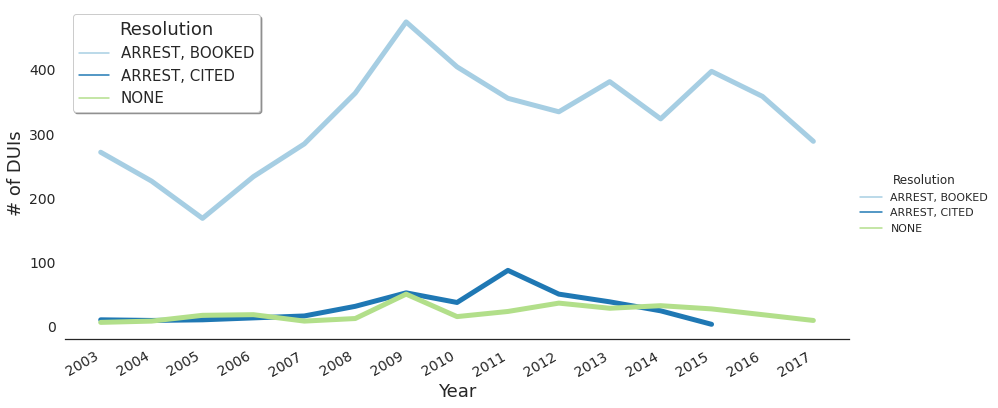

In [37]:
# make a graph describing the number of DUIs over the years
sns.set(rc={'figure.figsize':(16,10)})
sns.set_style("white")
sns.plotting_context(rc={"legend.fontsize":20})

dui_cases = sns.relplot(kind="line", 
                        data=dui_data_res, 
                        x="Year", 
                        y="# of DUIs", 
                        hue="Resolution", 
                        palette="Paired",
                        height=6, 
                        aspect=2,
                        linewidth=5,
                        legend=min)

sns.despine(left=True)
plt.legend(loc="best",
           fontsize = 15,
#           bbox_to_anchor= (1.03, 1),
           title="Resolution",
           title_fontsize = 18,
           shadow = True,
           facecolor = 'white',
           frameon=True)

# Label x axis beutifully
plt.gcf().autofmt_xdate()
plt.ylabel('# of DUIs', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.xticks([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
            2011, 2012, 2013, 2014, 2015, 2016, 2017],fontsize=14)
plt.yticks(fontsize=14)

plt.show()

# 1200 Plus Arrested During Bay Area Anti-DUI Campaign by Bay City News | December 27, 2009 8:20 am 
# 2013 Labor Day Campaign: Avoid the 23 DUI Task Force
# 2015 Super Bowl Sunday DUI Saturation Patrol

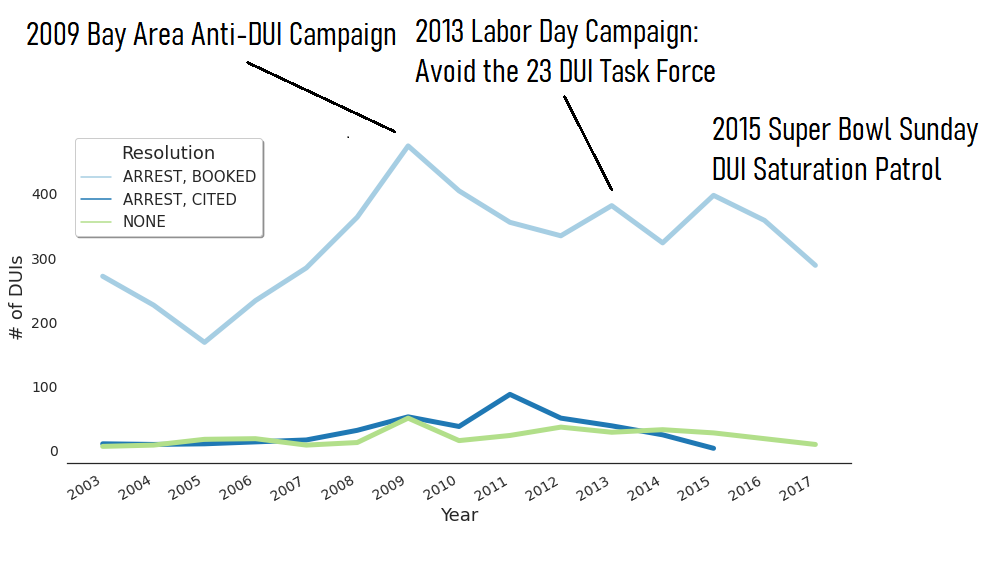

# Conclusions From Number of DUI Incidents From 2003 to 2017
The original graph was modified with annotations done with graphics manipulation software. The tree peaks of numbers of arrests corresponds with aggressive "Avoid DUI Compaings" executed in the Bay Area and affected the number of arrests associated with DUI charges in 2009 and 2013. In 2015 there was another compaign against DUI, but it was linked to big sports event held at Santa Clata, CA - Super Bowl Sunday. A lot of times when people get pulled over for DUI, they are arressted and booked in for forther processing, versus getting let go or just recieving a citation. 

In [38]:
dui_data_time = dui_data.groupby(by=["Time", 'Resolution'], as_index=False)['# of DUIs'].count()

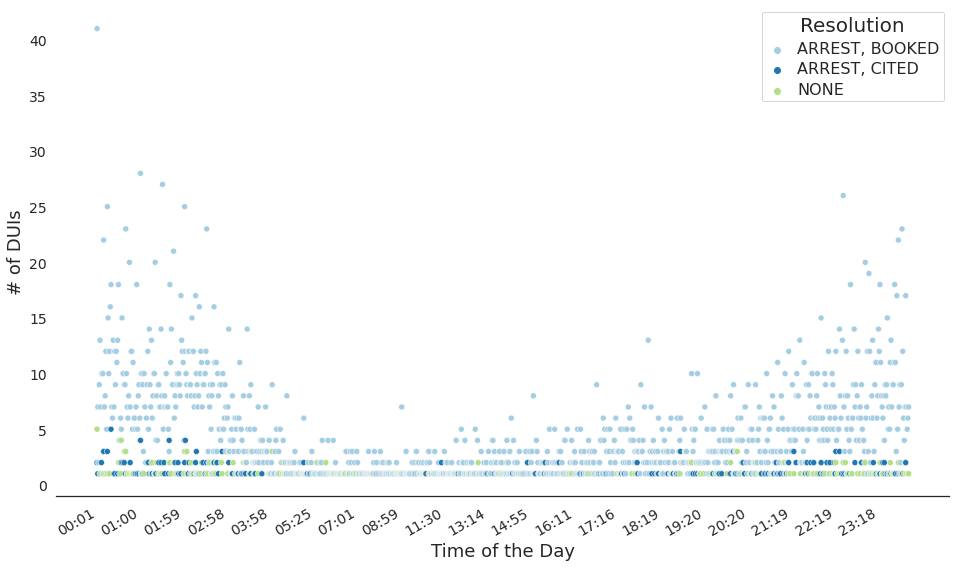

In [39]:
# Number of DUI arrests by day time
sns.set(rc={'figure.figsize':(16,10)})
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("white")

dui_time_arrests = sns.scatterplot(data=dui_data_time, 
                x="Time", 
                y="# of DUIs", 
                hue="Resolution",
                palette="Paired",
                legend="full")

sns.despine(left=True)

# Label x axis beutifully
plt.gcf().autofmt_xdate()


for ind, label in enumerate(dui_time_arrests.get_xticklabels()):
    if ind % 59 == 0:  # every 60s label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

#plt.title('Total # of Incidents Through Decades', fontsize=20, x=0.32)
plt.ylabel('# of DUIs', fontsize=18)
plt.xlabel('Time of the Day', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# for legend text
plt.setp(dui_time_arrests.get_legend().get_texts(), fontsize='16') 
# for legend title
plt.setp(dui_time_arrests.get_legend().get_title(), fontsize='20') 

plt.show()

# Conclusions From Number of DUI Incidents Over 24 Hours
Most people who get pulled over for the DUI happen between 12 am until around 4 am and between 5 pm until 12 am. 

The chances of getting arrested and booked for the DUI during the day hours from 6 am to 5 pm are low, but never zero. 

##Don't drink and drive! You will get caught. 